<a href="https://colab.research.google.com/github/2303A52378/Explainable-AI-Practical/blob/main/practical_1_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Equation: y = 10.00 + 5.00x
Slope: Car sales increase by 5.00 per TV ad.
Intercept: 10.00 cars expected to be sold with 0 ads.
Predicted number of cars sold for 10 ads: 60.00
Showing SHAP Waterfall Plot for first prediction...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


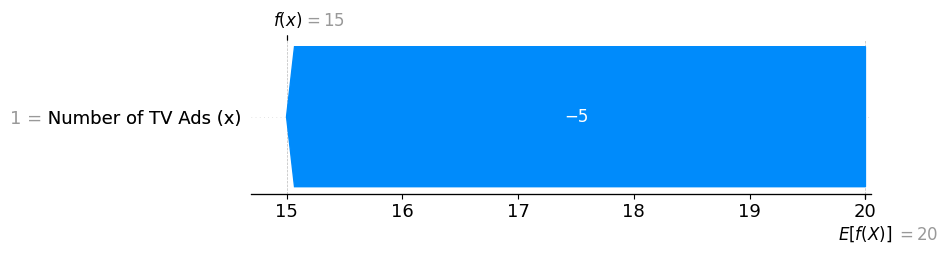

Showing SHAP Force Plot for all predictions...


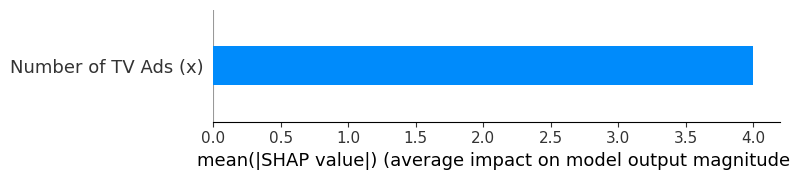

In [ ]:
# Question 1
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_excel("/content/Car_Sales.xlsx")

X = df[['Number of TV Ads (x)']]
y = df['Number of Cars Sold (y)']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear Regression Equation: y = {intercept:.2f} + {slope:.2f}x")
print(f"Slope: Car sales increase by {slope:.2f} per TV ad.")
print(f"Intercept: {intercept:.2f} cars expected to be sold with 0 ads.")

prediction = model.predict(np.array([[10]]))[0]
print(f"Predicted number of cars sold for 10 ads: {prediction:.2f}")

if not hasattr(np, 'bool'):
    np.bool = bool

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

print("Showing SHAP Waterfall Plot for first prediction...")
shap.plots.waterfall(shap_values[0])

print("Showing SHAP Force Plot for all predictions...")
shap.plots.force(shap_values)

shap.summary_plot(shap_values, X, plot_type="bar")


Model: Test_Score = 0.50*IQ + 0.50*Study_Hours + 20.00
Prediction for IQ=95, Study Hours=25: 80.00


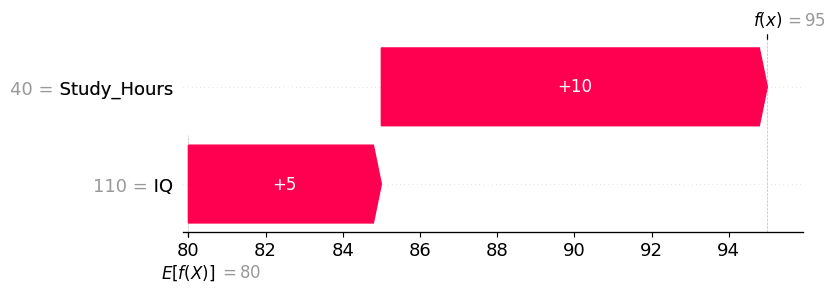


Student 1:
Base value: 80.00
IQ contribution: 5.00
Study Hours contribution: 10.00
Final predicted score: 95.00
Study Hours contribute MORE than IQ

Student 2:
Base value: 80.00
IQ contribution: 10.00
Study Hours contribution: 5.00
Final predicted score: 95.00
IQ contributes MORE than Study Hours

Student 3:
Base value: 80.00
IQ contribution: 0.00
Study Hours contribution: 0.00
Final predicted score: 80.00
IQ contributes MORE than Study Hours

Student 4:
Base value: 80.00
IQ contribution: -5.00
Study Hours contribution: -10.00
Final predicted score: 65.00
Study Hours contribute MORE than IQ

Student 5:
Base value: 80.00
IQ contribution: -10.00
Study Hours contribution: -5.00
Final predicted score: 65.00
IQ contributes MORE than Study Hours


In [7]:
# Question 2
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_excel("/content/StudyHour.xlsx")
df.columns = df.columns.str.strip()
df = df.rename(columns={
    'IQ': 'IQ',
    'IQ \n': 'IQ',
    'StudyHours': 'Study_Hours',
    'TestScore': 'Test_Score'
})

X = df[['IQ', 'Study_Hours']]
y = df['Test_Score']

model = LinearRegression()
model.fit(X, y)

print(f"Model: Test_Score = {model.coef_[0]:.2f}*IQ + {model.coef_[1]:.2f}*Study_Hours + {model.intercept_:.2f}")

pred_value = model.predict(pd.DataFrame([[95, 25]], columns=['IQ', 'Study_Hours']))[0]
print(f"Prediction for IQ=95, Study Hours=25: {pred_value:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values)

for i in range(len(X)):
    iq_contrib = shap_values.values[i][0]
    hours_contrib = shap_values.values[i][1]
    base_value = shap_values.base_values[i]
    predicted = model.predict(pd.DataFrame([X.iloc[i]], columns=X.columns))[0]

    print(f"\nStudent {i+1}:")
    print(f"Base value: {base_value:.2f}")
    print(f"IQ contribution: {iq_contrib:.2f}")
    print(f"Study Hours contribution: {hours_contrib:.2f}")
    print(f"Final predicted score: {predicted:.2f}")

    if abs(hours_contrib) > abs(iq_contrib):
        print("Study Hours contribute MORE than IQ")
    else:
        print("IQ contributes MORE than Study Hours")

Model: Salary = 9449.96 * YearsExperience + 25792.20
Prediction for 3.5 years: 58867.07
Prediction for 7 years: 91941.94


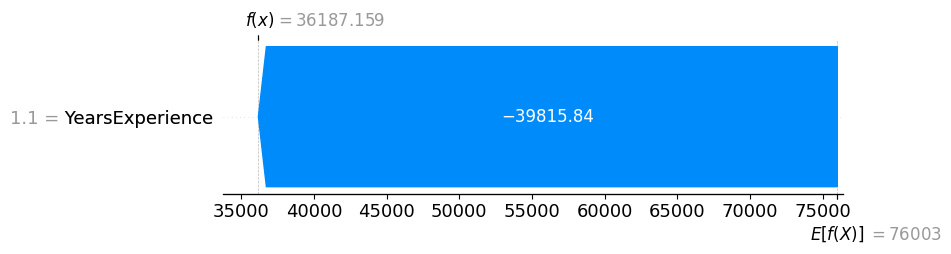


Employee 1:
Base value: 76003.00
YearsExperience contribution: -39815.84
Final predicted salary: 36187.16

Employee 2:
Base value: 76003.00
YearsExperience contribution: -37925.85
Final predicted salary: 38077.15

Employee 3:
Base value: 76003.00
YearsExperience contribution: -36035.86
Final predicted salary: 39967.14

Employee 4:
Base value: 76003.00
YearsExperience contribution: -31310.88
Final predicted salary: 44692.12

Employee 5:
Base value: 76003.00
YearsExperience contribution: -29420.88
Final predicted salary: 46582.12

Employee 6:
Base value: 76003.00
YearsExperience contribution: -22805.91
Final predicted salary: 53197.09

Employee 7:
Base value: 76003.00
YearsExperience contribution: -21860.91
Final predicted salary: 54142.09

Employee 8:
Base value: 76003.00
YearsExperience contribution: -19970.92
Final predicted salary: 56032.08

Employee 9:
Base value: 76003.00
YearsExperience contribution: -19970.92
Final predicted salary: 56032.08

Employee 10:
Base value: 76003.00
Ye

In [8]:
# Question 3
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

shap.initjs()

df = pd.read_csv("/content/Experience_Salary.csv")

X = df[['YearsExperience']]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)

print(f"Model: Salary = {model.coef_[0]:.2f} * YearsExperience + {model.intercept_:.2f}")

pred_3_5 = model.predict(pd.DataFrame([[3.5]], columns=['YearsExperience']))[0]
pred_7 = model.predict(pd.DataFrame([[7]], columns=['YearsExperience']))[0]

print(f"Prediction for 3.5 years: {pred_3_5:.2f}")
print(f"Prediction for 7 years: {pred_7:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values[0])

for i in range(len(X)):
    contrib = shap_values.values[i][0]
    base_value = shap_values.base_values[i]
    predicted = model.predict(pd.DataFrame([X.iloc[i]], columns=X.columns))[0]
    print(f"\nEmployee {i+1}:")
    print(f"Base value: {base_value:.2f}")
    print(f"YearsExperience contribution: {contrib:.2f}")
    print(f"Final predicted salary: {predicted:.2f}")

Model: Sales = 8.22*Int + 49.71*Ext + 993.92
Prediction for Int=100, Ext=25: 3058.63
Prediction for Int=120, Ext=18: 2875.07


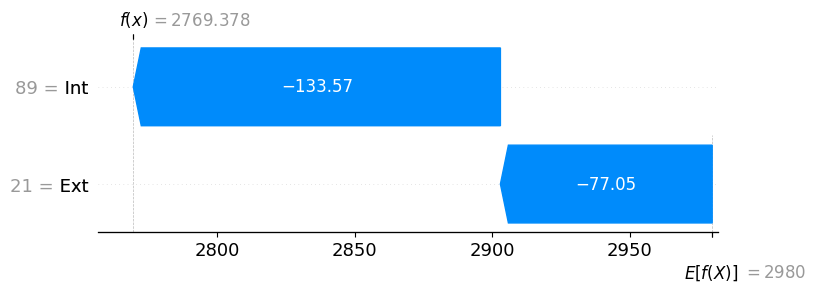

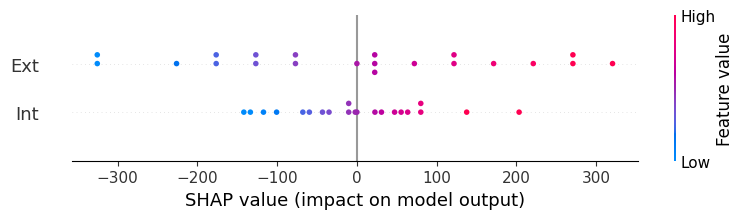


Salesperson 1:
Base value: 2980.00
Intelligence contribution: -133.57
Extroversion contribution: -77.05
Final predicted sales: 2769.38
Intelligence contributes MORE

Salesperson 2:
Base value: 2980.00
Intelligence contribution: -100.69
Extroversion contribution: 72.08
Final predicted sales: 2951.38
Intelligence contributes MORE

Salesperson 3:
Base value: 2980.00
Intelligence contribution: -117.13
Extroversion contribution: -77.05
Final predicted sales: 2785.82
Intelligence contributes MORE

Salesperson 4:
Base value: 2980.00
Intelligence contribution: 137.68
Extroversion contribution: 22.37
Final predicted sales: 3140.05
Intelligence contributes MORE

Salesperson 5:
Base value: 2980.00
Intelligence contribution: 80.14
Extroversion contribution: 221.20
Final predicted sales: 3281.35
Extroversion contributes MORE

Salesperson 6:
Base value: 2980.00
Intelligence contribution: -43.15
Extroversion contribution: -226.17
Final predicted sales: 2710.67
Extroversion contributes MORE

Salesper

In [9]:
# Question 4
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

shap.initjs()

df = pd.read_excel("/content/Int_Ext.xlsx")
df = df[['Int', 'Ext', 'sal']].dropna()

X = df[['Int', 'Ext']]
y = df['sal']

model = LinearRegression()
model.fit(X, y)

print(f"Model: Sales = {model.coef_[0]:.2f}*Int + {model.coef_[1]:.2f}*Ext + {model.intercept_:.2f}")

pred_1 = model.predict(pd.DataFrame([[100, 25]], columns=['Int', 'Ext']))[0]
pred_2 = model.predict(pd.DataFrame([[120, 18]], columns=['Int', 'Ext']))[0]

print(f"Prediction for Int=100, Ext=25: {pred_1:.2f}")
print(f"Prediction for Int=120, Ext=18: {pred_2:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values[0])
shap.summary_plot(shap_values, X)

for i in range(len(X)):
    int_contrib = shap_values.values[i][0]
    ext_contrib = shap_values.values[i][1]
    base_value = shap_values.base_values[i]
    predicted = model.predict(pd.DataFrame([X.iloc[i]], columns=X.columns))[0]
    print(f"\nSalesperson {i+1}:")
    print(f"Base value: {base_value:.2f}")
    print(f"Intelligence contribution: {int_contrib:.2f}")
    print(f"Extroversion contribution: {ext_contrib:.2f}")
    print(f"Final predicted sales: {predicted:.2f}")
    if abs(int_contrib) > abs(ext_contrib):
        print("Intelligence contributes MORE")
    else:
        print("Extroversion contributes MORE")


Model: y = 0.20*facebook + 0.01*newspaper + 11.00
Prediction for Facebook=50, Newspaper=70: 21.44
Prediction for Facebook=25, Newspaper=30: 16.18


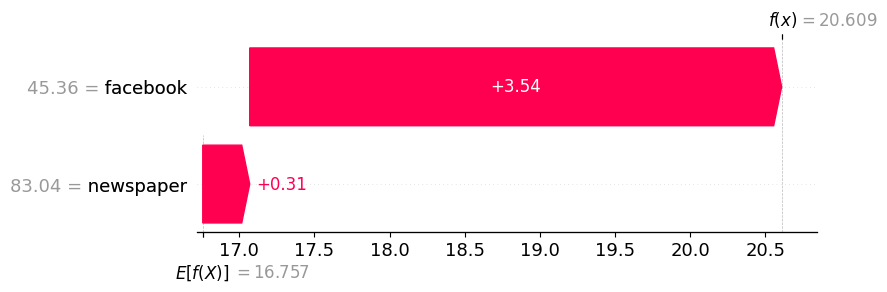

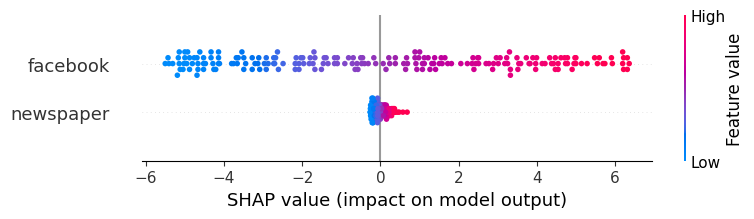

In [10]:
# Question 5
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap

df = pd.read_excel("/content/Marketing_Dataset.xlsx")
df = df[['facebook', 'newspaper', 'sales']].dropna()

X = df[['facebook', 'newspaper']]
y = df['sales']

model = LinearRegression()
model.fit(X, y)

print(f"Model: y = {model.coef_[0]:.2f}*facebook + {model.coef_[1]:.2f}*newspaper + {model.intercept_:.2f}")

print(f"Prediction for Facebook=50, Newspaper=70: {model.predict(pd.DataFrame([[50, 70]], columns=['facebook', 'newspaper']))[0]:.2f}")
print(f"Prediction for Facebook=25, Newspaper=30: {model.predict(pd.DataFrame([[25, 30]], columns=['facebook', 'newspaper']))[0]:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0], show=True)
shap.force_plot(explainer.expected_value, shap_values[0].values, X.iloc[0])
shap.summary_plot(shap_values, X)
